# Intervalo de confiança

- Fórmula do intervalo de confiança (IC)
<div style="text-align: center; font-size: 20px;">
    $IC = \bar{x} \pm z_{\alpha/2} \frac{σ}{\sqrt{n}}$
</div>


onde,

x̅ = média da amostra  
z = valor crítico associado ao nível de confiança (1 - α)  
σ = desvio padrão da amostra  
n = tamanho da amostra  

# Bibliotecas

In [33]:
import numpy as np
from scipy.stats import norm
from scipy import stats
import math

import matplotlib.pyplot as plt
import scienceplots

# Implementação

OBS: Dados de altura.

In [2]:
dados = np.array([126. , 129.5, 133. , 133. , 136.5, 136.5, 140. , 140. , 140. ,
                  140. , 143.5, 143.5, 143.5, 143.5, 143.5, 143.5, 147. , 147. ,
                  147. , 147. , 147. , 147. , 147. , 150.5, 150.5, 150.5, 150.5,
                  150.5, 150.5, 150.5, 150.5, 154. , 154. , 154. , 154. , 154. ,
                  154. , 154. , 154. , 154. , 157.5, 157.5, 157.5, 157.5, 157.5,
                  157.5, 157.5, 157.5, 157.5, 157.5, 161. , 161. , 161. , 161. ,
                  161. , 161. , 161. , 161. , 161. , 161. , 164.5, 164.5, 164.5,
                  164.5, 164.5, 164.5, 164.5, 164.5, 164.5, 168. , 168. , 168. ,
                  168. , 168. , 168. , 168. , 168. , 171.5, 171.5, 171.5, 171.5,
                  171.5, 171.5, 171.5, 175. , 175. , 175. , 175. , 175. , 175. ,
                  178.5, 178.5, 178.5, 178.5, 182. , 182. , 185.5, 185.5, 189., 192.5])

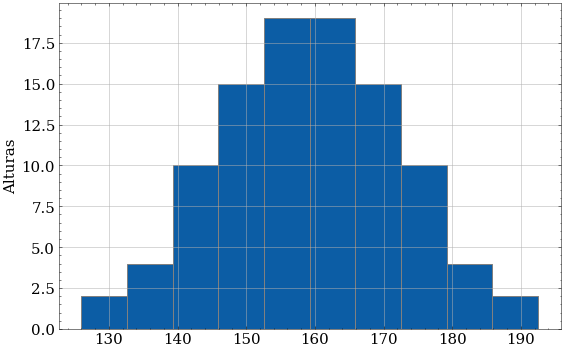

In [43]:
# Checando a distribuição dos dados

plt.rcParams['font.size'] = 15
plt.style.use('science')
plt.rcParams['figure.figsize'] = (7,5)
plt.rcParams['font.size'] = 15
plt.rcParams['text.usetex'] = False

plt.figure(figsize=(9,6))
plt.hist(dados, edgecolor='gray')
plt.ylabel('Alturas')
plt.grid(True)
plt.show();

### Colocando dados na fórmula

In [4]:
n = len(dados)
media = np.mean(dados)
desviop = np.std(dados)
alpha = 0.05 / 2 # 95% de confiança
z = norm.ppf(1 - alpha)

In [5]:
n, media, desviop, alpha, z

(100, 159.25, 13.65, 0.025, 1.959963984540054)

### Calculando intervalos

In [10]:
x_superior = media + z * (desviop / math.sqrt(n))
x_inferior = media - z * (desviop / math.sqrt(n))

In [11]:
x_inferior, media,  x_superior

(156.57464916110283, 159.25, 161.92535083889717)

### Colocando a margem de erro

In [12]:
margem_erro = abs(media - x_superior)
margem_erro

2.675350838897174

# Implementação com o Scipy

σ / √n

In [44]:
stats.sem(dados)

1.3718766178288244

In [51]:
desviop / math.sqrt(n-1)

1.3718766178288246

In [46]:
# Calculando os intervalos com o stats

In [48]:
intervalos = norm.interval(0.95, media, stats.sem(dados))
intervalos 

(156.5611712378229, 161.9388287621771)

In [50]:
margem_erro = media - intervalos
margem_erro

array([ 2.68882876, -2.68882876])

# Testes com diferentes níveis de confiança

In [55]:
# 0.99

In [53]:
intervalos = norm.interval(0.99, media, stats.sem(dados))
intervalos

(155.71628000694295, 162.78371999305705)

In [54]:
margem_erro = media - intervalos
margem_erro

array([ 3.53371999, -3.53371999])

**OBS**: observar que com o nível de confiança maior, maior também a faixa de valores (intervalos mais abertos), indicando que os registros da população possuem mais chances de cair nesse intervalo do que no de um nível de confiança menor. Ainda nesse intuito, vê-se que a margem de erro é maior quando o nível de confiança também é maior. 

In [56]:
# 0.80

In [57]:
intervalos = norm.interval(0.80, media, stats.sem(dados))
intervalos

(157.49186937268743, 161.00813062731257)

In [58]:
margem_erro = media - intervalos
margem_erro

array([ 1.75813063, -1.75813063])